# FINAL PROJECT 3

# Nama : Dhelya Apriliani Putri

# PYTN-KS19-013

**Latar Belakang** 

Penyakit gagal jantung merupakan masalah serius dalam kesehatan yang sangat berdampak berbagai negara. Dengan dataset klinis yang digunakan dalam projek ini akan menjadi sumber informasi terkait kondisi kesehatan beberapa pasien yang memiliki potensi risiko terkena gagal jantung. Dataset ini membagi informasi antara pasien yang telah mengalami gagal jantung dan pasien yang tidak mengalami gagal jantung, tentunya merepresentasikan dua kelas yang dapat diprediksi. Data kali ini, tidak hanya mencakup paramater soal medis seperti usia, riwayat penyakit, dsb. Tetapi juga memberikan gambaran menyeluruh terkait faktor-faktor lain yang mungkin berperan dalam prediksi terkena gagal jantung.

Dengan menggunakan teknik Ensemble Model ini dapat menghasilkan prediksi yang akurat terkait kemungkinan potensi terkena gagal jantung pada pasien-pasien terkait. Melalui analisis yang mendalam agar dapat membangun sebuah model prediksi yang dapat memberikan wawasan yang mendalam tentang bagaimana variabel-variabel tertentu dapat mempengaruhi risiko gagal jantung pada setiap pasien. Sehingga, hasil prediksi ini dapat menjadi manfaat bagi praktisi kesehatan untuk mendeteksi risiko secara dini, memberikan perawatan yang lebih terfokus, dan memaksimalkan upaya pencegahan terkena gagal jantung.

Projek ini memiliki potensi besar untuk memberikan pemahaman terhadap gagal jantung, tidak hanya sebagai penyakit tetapi juga sebagai hasil interaksi berbagai faktor kesehatan pada setiap individu. Dengan pendekatan yang kuat terhadap data ini melalui teknik Ensemble Model melalui Random Forest, diharapkan dapat memberikan kontribusi yang signifikan dalam upaya pencegahan dan pengelolaan penyakit yang serius ini.

## Import Pustaka

In [1]:
import pandas as pd
import numpy as np # linear algebra

import missingno as msn

# import libraries for plotting
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv') # Membaca dataset pasien yang mengalami gagal jantung
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.head() # Check dataset baris teratas

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.tail() # Check dataset baris terbawah

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
df.info() # Check jumlah baris, jumlah kolom, tipe data setiap kolom, dan jumlah nilai yang tidak null dalam setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Info dataset tersebut menunjukan bahwa tidak ada nilai null pada dataset dan nilainya numerik. Meskipun ada 3 nilai float dalam kumpulan data, ada 10 tipe data int

In [7]:
df.shape # Check jumlah baris dan kolom

(299, 13)

**Baris 299**

**Kolom 13**

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Data Cleaning

In [9]:
df = df.rename(columns={'time': 'day'}) # Mengubah nama kolom 'time' menjadi 'day'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  day                       299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
# Check missing values pada masing-masing kolom
df_mv = pd.DataFrame(df.isna().sum()).reset_index()
df_mv.columns = ['Features','Missing Values']
df_mv

,Features,Missing Values
0,age,0
1,anaemia,0
2,creatinine_phosphokinase,0
3,diabetes,0
4,ejection_fraction,0
5,high_blood_pressure,0
6,platelets,0
7,serum_creatinine,0
8,serum_sodium,0
9,sex,0


Ketika missing values sama dengan 0, itu menunjukkan bahwa dataset tersebut lengkap, dan tidak ada informasi yang hilang atau tidak diketahui dalam data tersebut.

In [11]:
# Check jumlah baris yang memiliki duplikat dalam DataFrame
df.duplicated().sum()

0

Tidak ada nilai duplikat

In [12]:
# Cek nilai yang unique pada dataset

cek_nunique = df.nunique()
cek_nunique = cek_nunique.to_frame(name='Jumlah')
cek_nunique.reset_index(inplace=True)
cek_nunique.rename(columns={'index': 'Kolom'}, inplace=True)
cek_nunique

,Kolom,Jumlah
0,age,47
1,anaemia,2
2,creatinine_phosphokinase,208
3,diabetes,2
4,ejection_fraction,17
5,high_blood_pressure,2
6,platelets,176
7,serum_creatinine,40
8,serum_sodium,27
9,sex,2


In [13]:
# Check berapa banyak kolom yang memiliki nilai unik kurang dari 3
for i in df.columns:
    if df[i].nunique() < 3:
        print(i)

anaemia
diabetes
high_blood_pressure
sex
smoking
DEATH_EVENT


DEATH_EVENT adalah kolom yang memiliki nilai 1 dan 0 di dalamnya

## EXPLORASI DATA

In [14]:
df.describe().T.reset_index().rename(
    columns={'index': 'Attribute'})

,Attribute,count,mean,std,min,25%,50%,75%,max
0,age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
1,anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
2,creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
3,diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
4,ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
5,high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
6,platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
7,serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
8,serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
9,sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


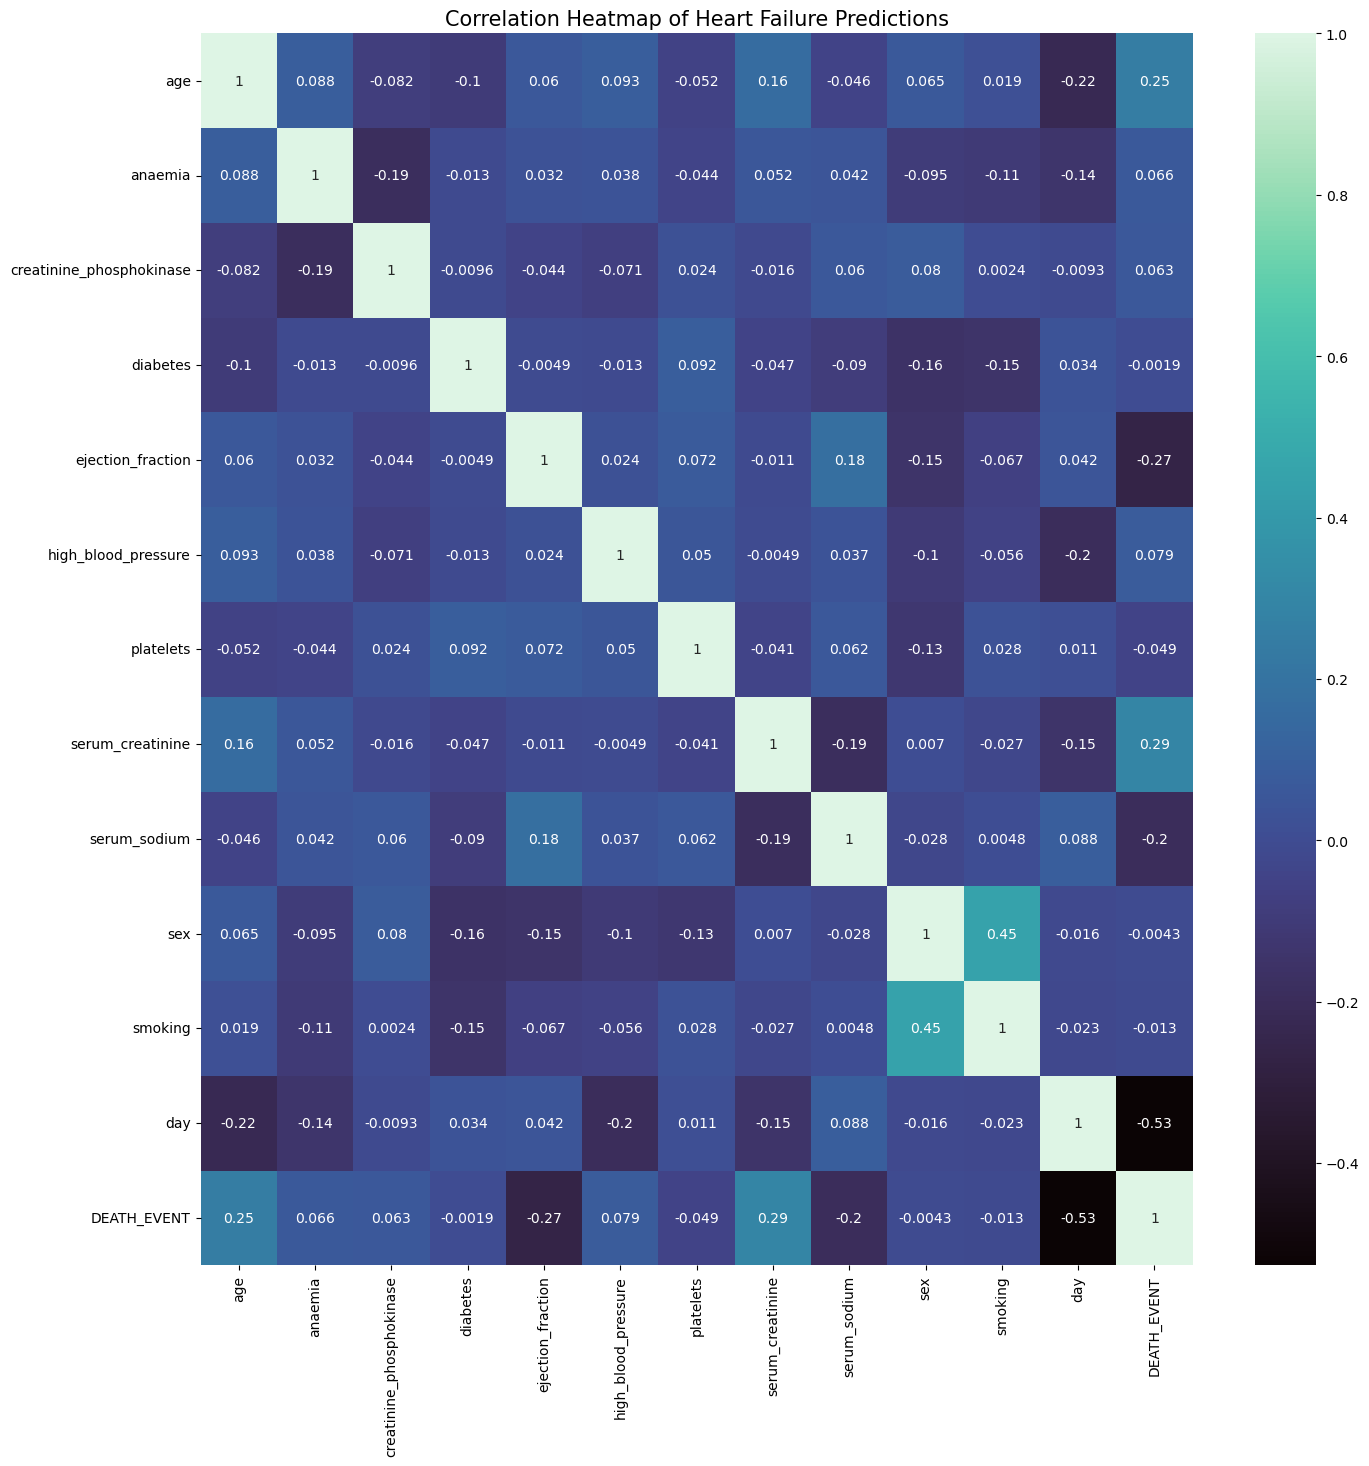

In [15]:
# correlation matrix

plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True, cmap="mako")
plt.title("Correlation Heatmap of Heart Failure Predictions",size=15)
plt.show()

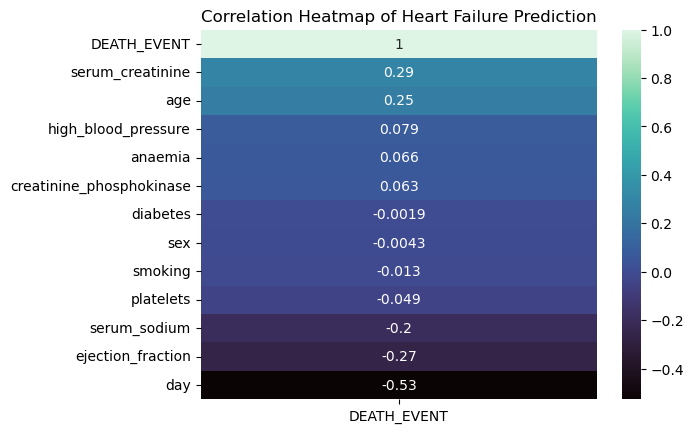

In [16]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True, cmap="mako")
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

Heatmap diatas menunjukan bahwa nilai korelasi masing-masing variabel terhadap variabel DEATH_EVENT menunjukan angka yang cukup kecil. Variabel yang memiliki korelasi cukup tinggi terhadap variabel DEATH_EVENT adalah serum_creatinine dan variabel yang memiliki korelasi sangat rendah terhadap variabel DEATH_EVENT adalah variabel day.

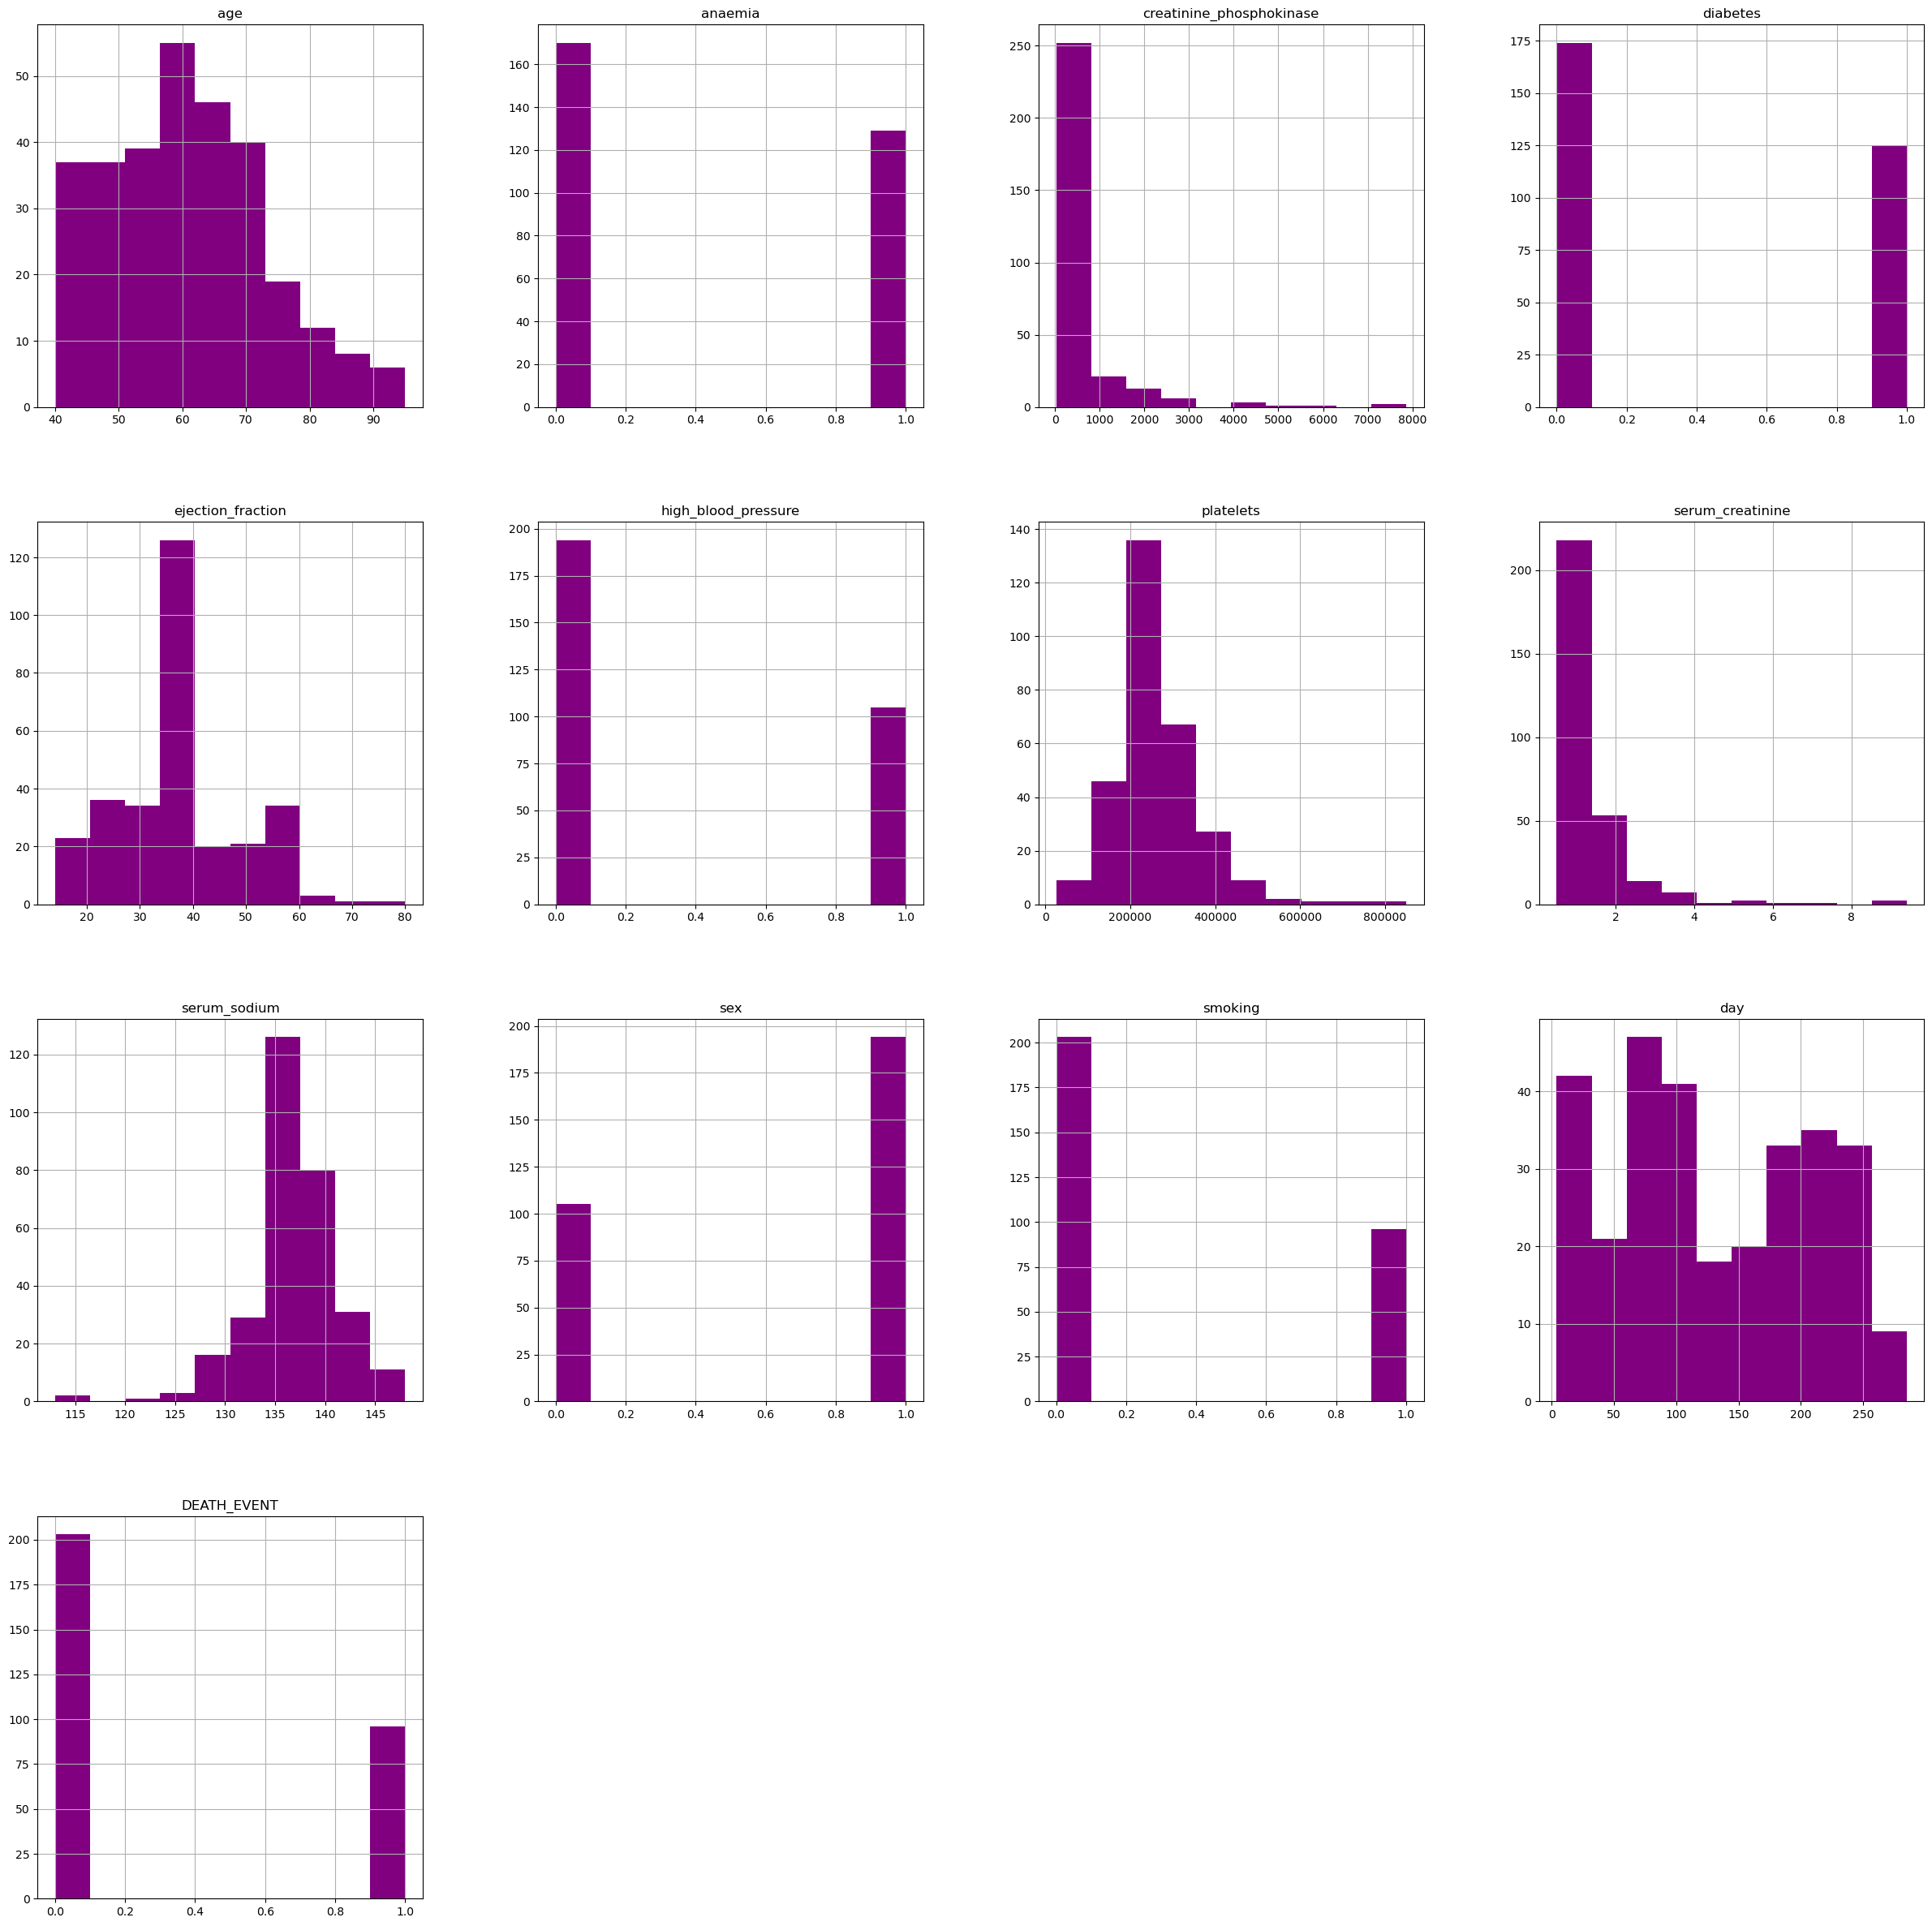

In [17]:
# Pesebaran data

df.hist(figsize = (30,30),color="purple")
plt.show()

**a.** Dari distribusi data tersebut, terlihat bahwa usia 60 tahun adalah yang tertinggi

**b.** Terlihat terdapat lebih dari 120 pasien yang mengalami anemia

**c.** Dari 299 pasien, kurang dari 100 pasien yang merokok

**d.** Sekitar 125 dari pasien menderita diabetes

**e.** Sebagian besar pasien adalah laki-laki

**f.** Kurang dari 100 pasien meninggal

In [18]:
# Mengelompokan Fitur berdasarkan Category dan Numerik

col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 2:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium day


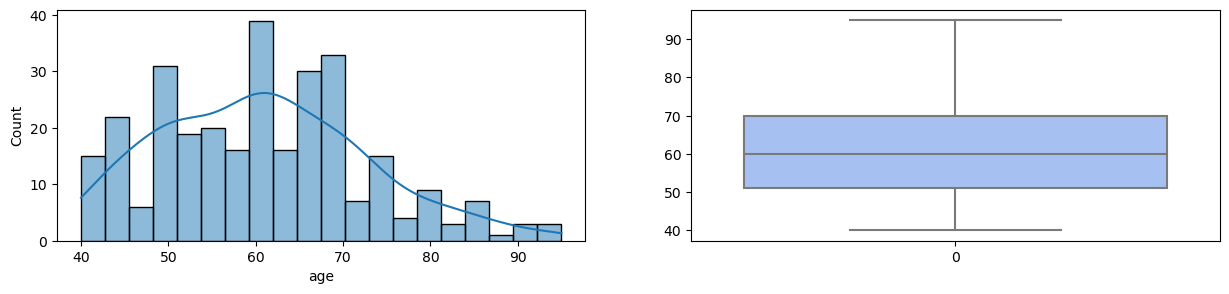

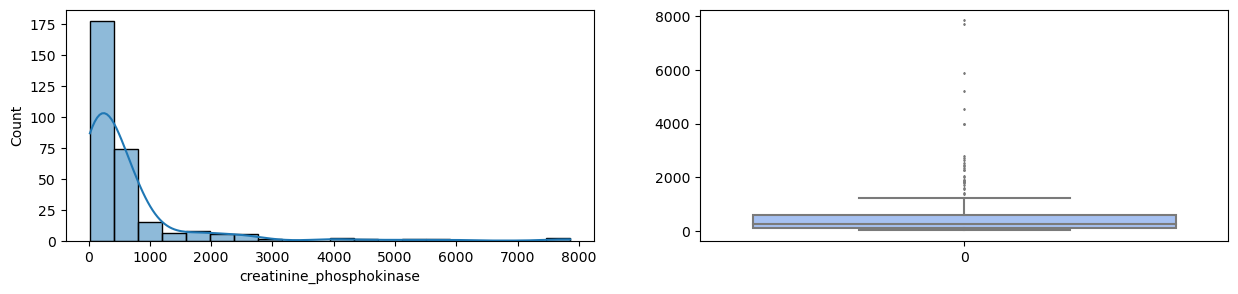

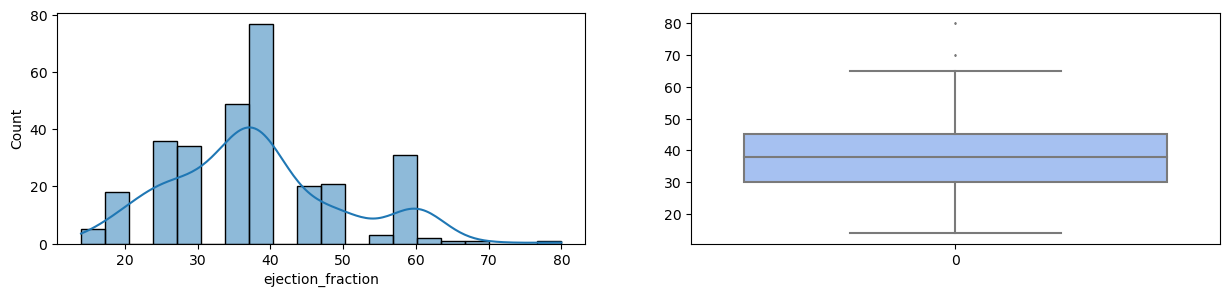

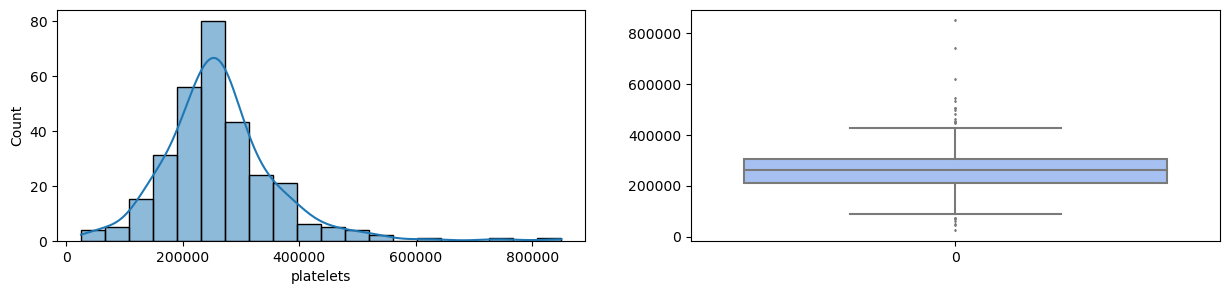

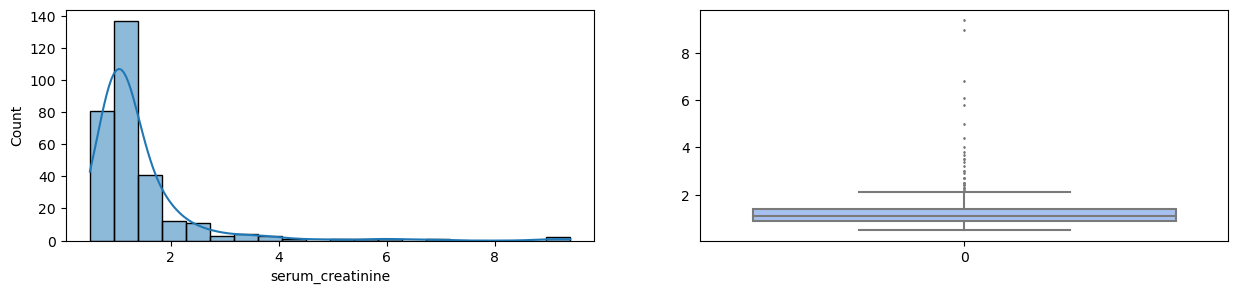

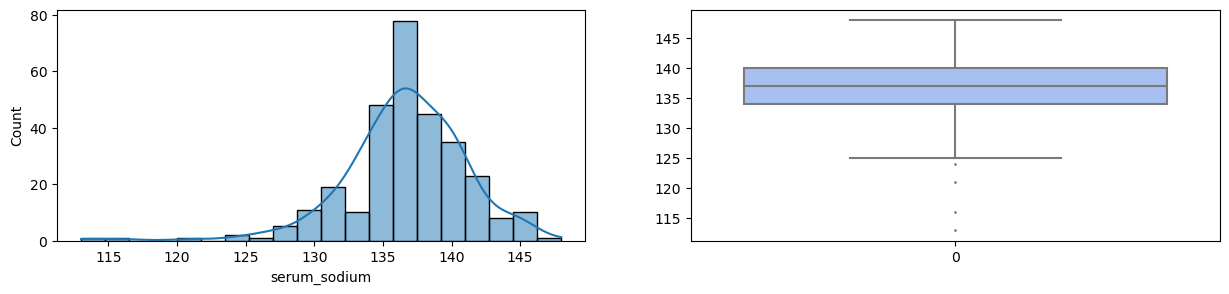

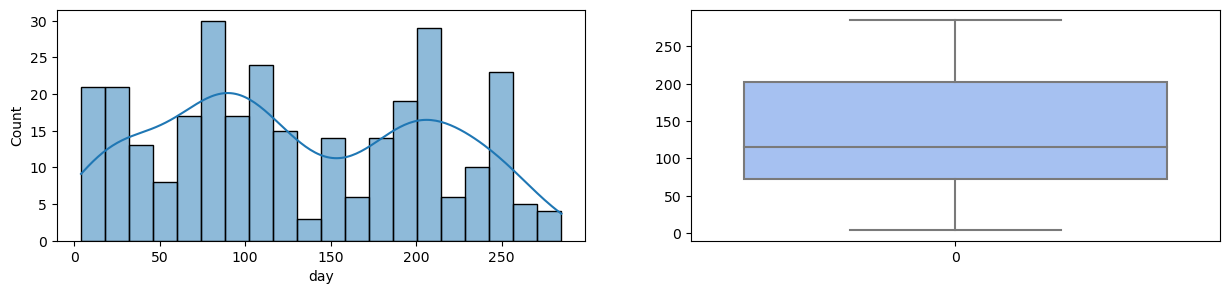

In [19]:
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "day"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

Berdasarkan visualisasi di atas dapat diketahui bahwa hampir semua variabel memiliki outliers. Maka dari itu harus dilakukan penanganan pada fitur-fitur yang memiliki outliers.

**BOOLEN**

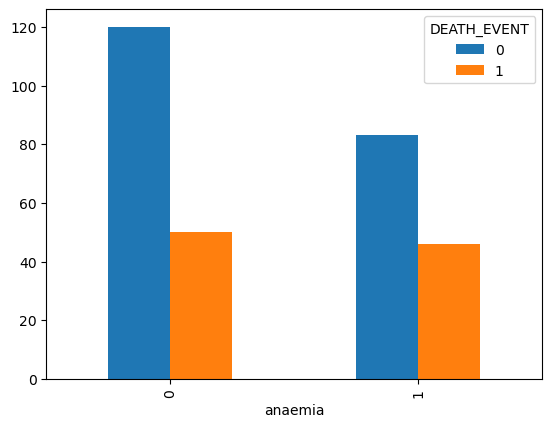

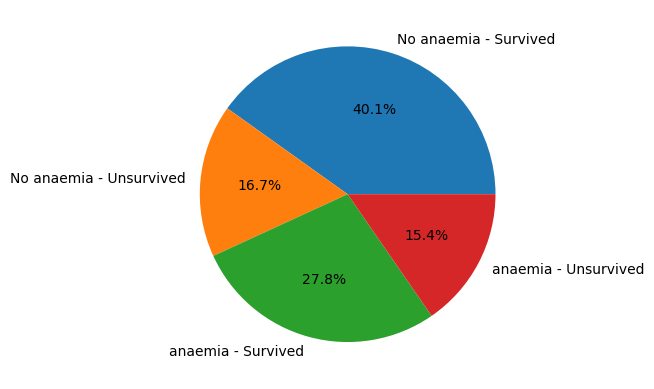

In [20]:
grouped_anaemia= df.groupby(['anaemia', 'DEATH_EVENT']).size()
grouped_anaemia.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_anaemia, labels=['No anaemia - Survived', 'No anaemia - Unsurvived', 'anaemia - Survived', 'anaemia - Unsurvived'], autopct='%1.1f%%')
plt.show()

Visualisasi anemia diatas menunjukan bahwa perbandingan antara populasi baik yang mengalami pengurangan hemoglobin (anemia) atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi populasi yang meninggal lebih banyak yang tidak mengalami penurunan hemoglobin (anemia), begitupun untuk frekuensi populasi yang tidak meninggal lebih banyak yang tidak mengalamai penurunan hemoglobin (anemia).

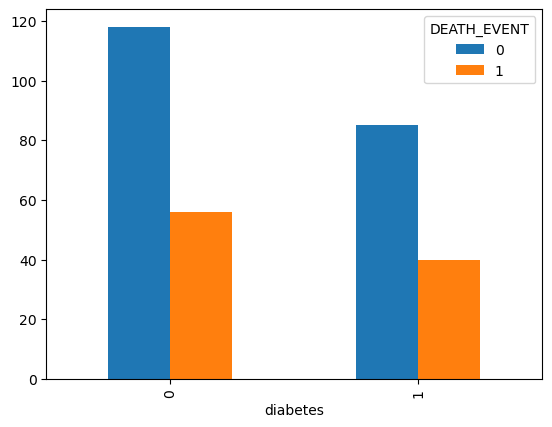

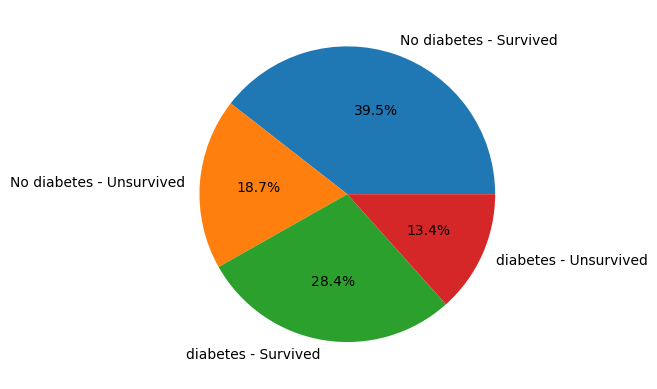

In [21]:
# Diabetes

grouped_diabetes= df.groupby(['diabetes', 'DEATH_EVENT']).size()
grouped_diabetes.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_diabetes, labels=['No diabetes - Survived', 'No diabetes - Unsurvived', 'diabetes - Survived', 'diabetes - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mengidap diabetes atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mengidap diabetes, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mengidap diabetes.

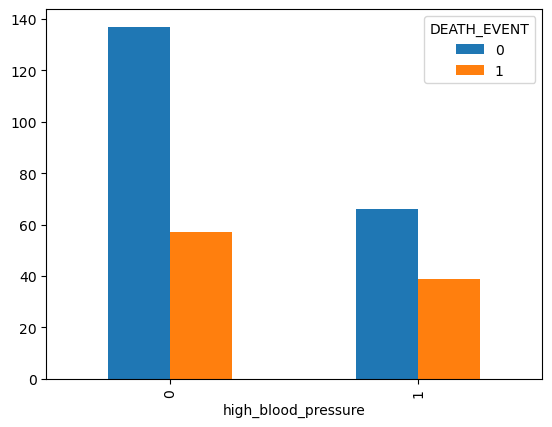

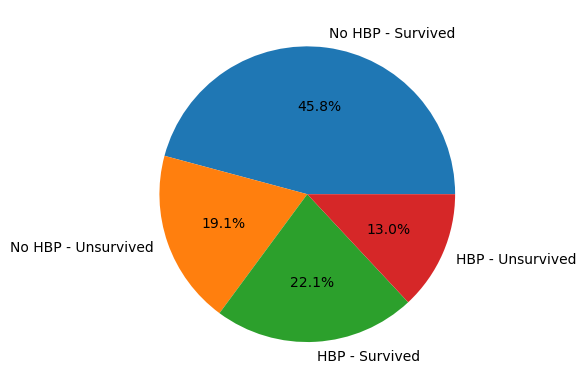

In [22]:
# high_blood_pressure

grouped_high_blood_pressure= df.groupby(['high_blood_pressure', 'DEATH_EVENT']).size()
grouped_high_blood_pressure.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_high_blood_pressure, labels=['No HBP - Survived', 'No HBP - Unsurvived', 'HBP - Survived', 'HBP - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mempunyai darah tinggi atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mempunyai darah tinggi, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mempunyai darah tinggi.

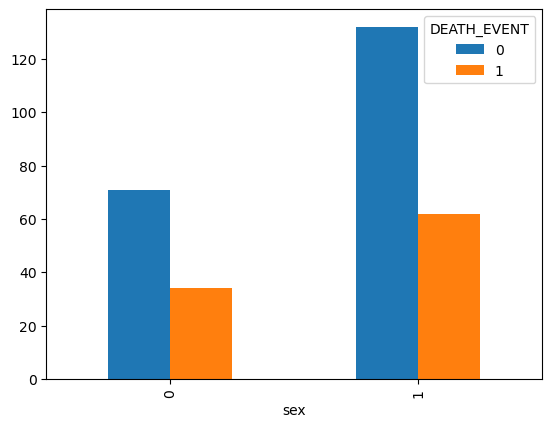

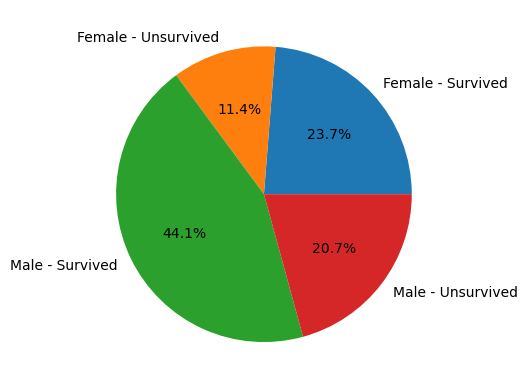

In [23]:
# Sex

grouped_sex= df.groupby(['sex', 'DEATH_EVENT']).size()
grouped_sex.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_sex, labels=['Female - Survived', 'Female - Unsurvived', 'Male - Survived', 'Male - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, frekuensi seseorang yang meninggal lebih banyak berjenis kelamin pria dibandingkan wanita, begitupun dengan frekuensi seseorang yang tidak meninggal lebih banyak yang berjenis kelamin pria.

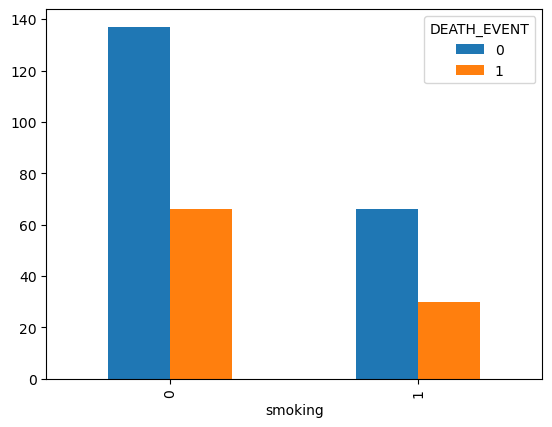

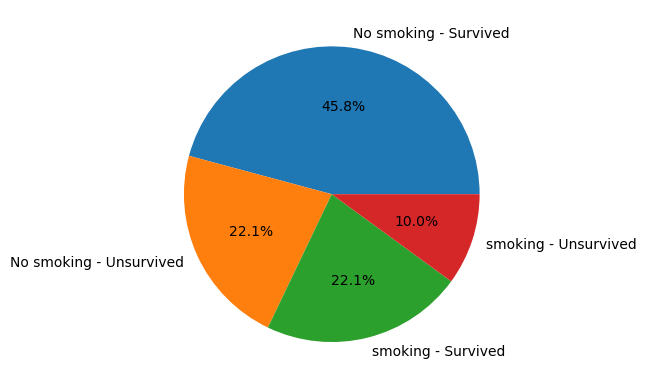

In [24]:
# smoking

grouped_smoking= df.groupby(['smoking', 'DEATH_EVENT']).size()
grouped_smoking.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_smoking, labels=['No smoking - Survived', 'No smoking - Unsurvived', 'smoking - Survived', 'smoking - Unsurvived'], autopct='%1.1f%%')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang merokok atau tidak, cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak merokok, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak merokok.

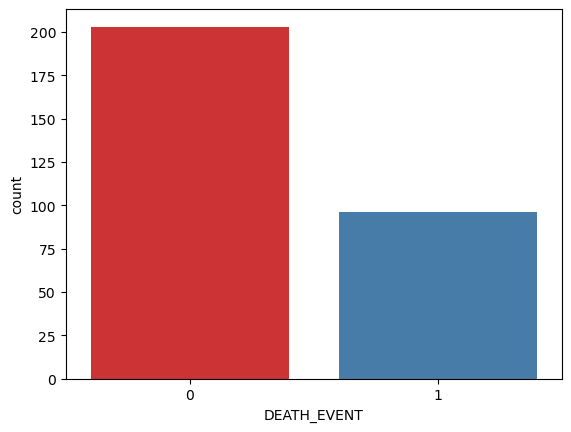

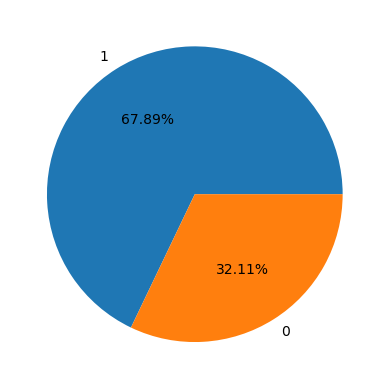

In [25]:
sns.countplot(x = 'DEATH_EVENT', data = df, palette = 'Set1')
plt.show()
plt.pie(x=df.DEATH_EVENT.value_counts().values,labels=df.DEATH_EVENT.unique().tolist(),autopct='%1.2f%%') 
plt.show()

Pada visualisasi di atas, dapat terlihat bahwa kolom DEATH_EVENT menunjukan data yang imbalanced. Imbalnaced sendiri merupakan suatu keadaan dimana distribusi kelas data tidak seimbang, jumlah kelas data (instance) yang satu lebih sedikit atau lebih banyak dibanding dengan jumlah kelas data lainnya. Selanjutnya akan kami lakukan penanganan agar data menjadi seimbang

## DATA PREPROCESSING

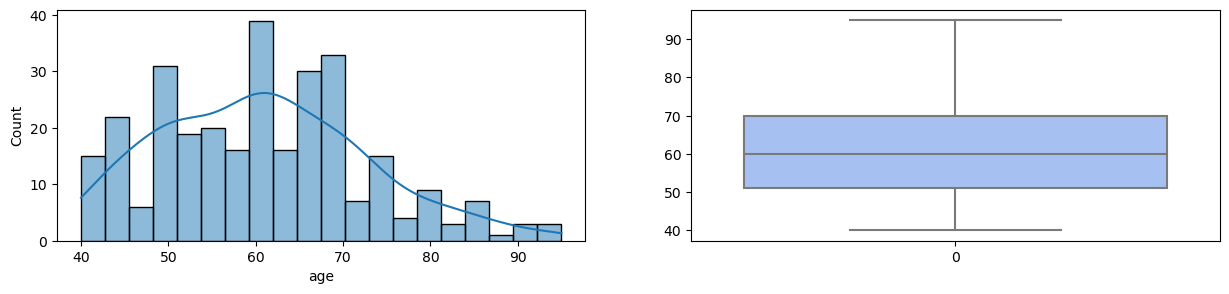

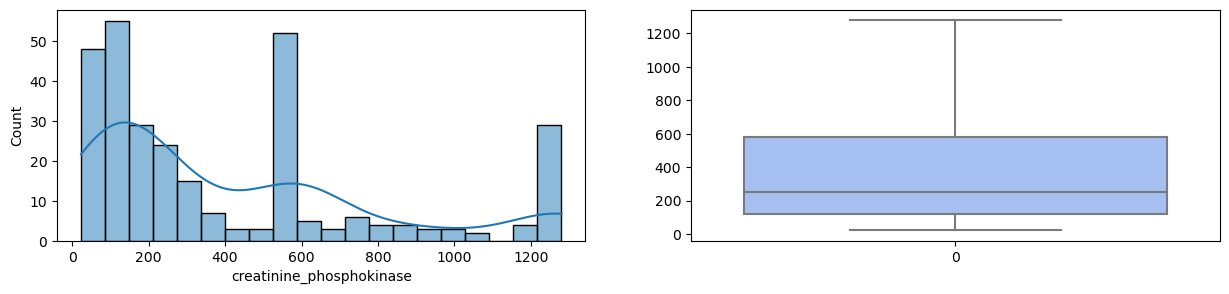

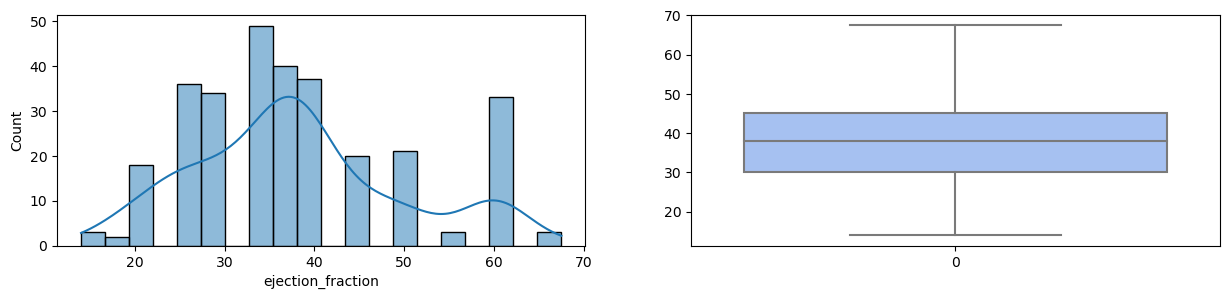

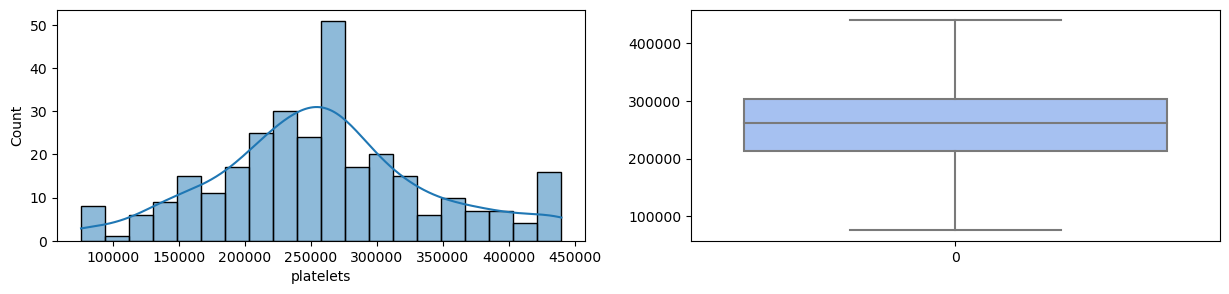

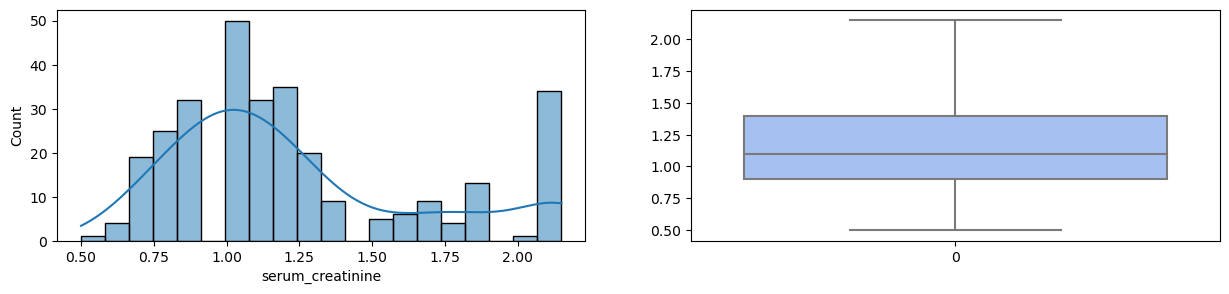

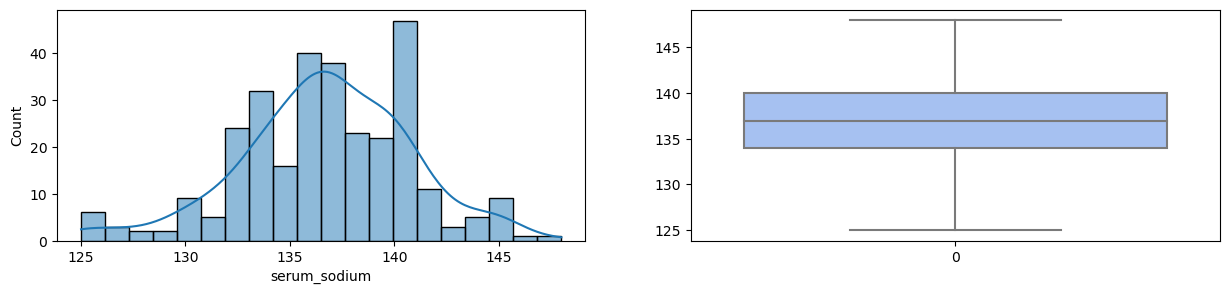

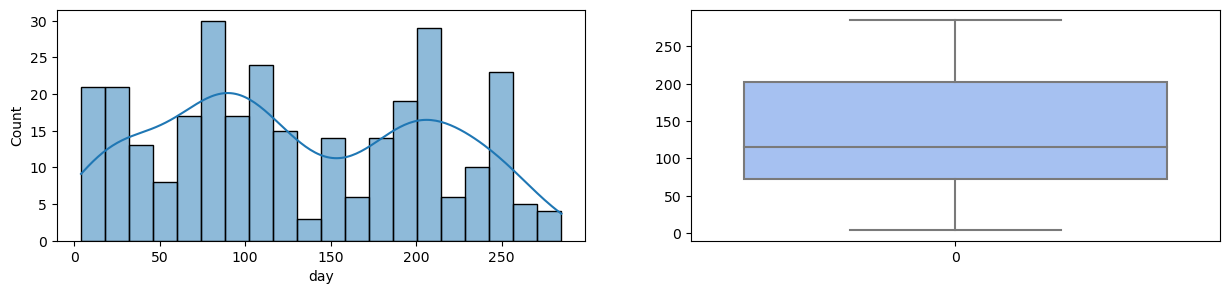

In [26]:
data = df.copy()

# Handling outlier

features_with_outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for feature in features_with_outliers:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data.loc[data[feature]<lower_limit,feature] = lower_limit
    data.loc[data[feature]>upper_limit,feature] = upper_limit
    
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "day"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

Pada visualisasi di atas bahwa sudah tidak ada outliers dan data memiliki persebaran yang baik.

In [28]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'day',
       'DEATH_EVENT'],
      dtype='object')

In [31]:
Features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'day']
Target = ['DEATH_EVENT']

In [32]:
X = df[Features]
y = df[Target].values
split_test_size = 0.20
y = y.ravel()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=split_test_size, random_state=42)

## MODELS

**Random Forest**

Accuracy:  0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.80        35
           1       0.85      0.44      0.58        25

    accuracy                           0.73        60
   macro avg       0.77      0.69      0.69        60
weighted avg       0.76      0.73      0.71        60



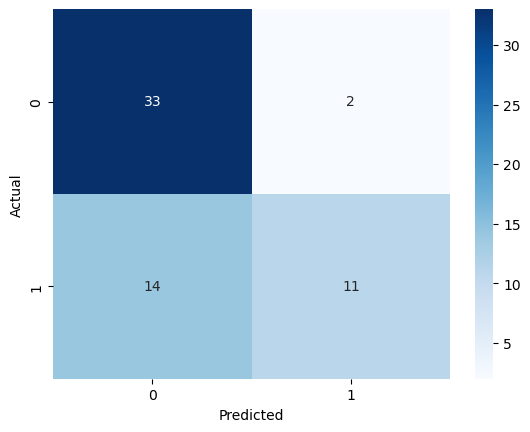

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

rfc = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)

# Prediksi menggunakan model Random Forest
predictions = rfc.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, predictions, labels=rfc.classes_)

# Menampilkan confusion matrix dengan format angka tanpa eksponensial menggunakan heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rfc.classes_, yticklabels=rfc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Finding Important Features in scikit-learn

In [36]:
feature_names = X.columns

In [37]:
feature_imp = pd.Series(rfc.feature_importances_, index=feature_names).sort_values(ascending=False)

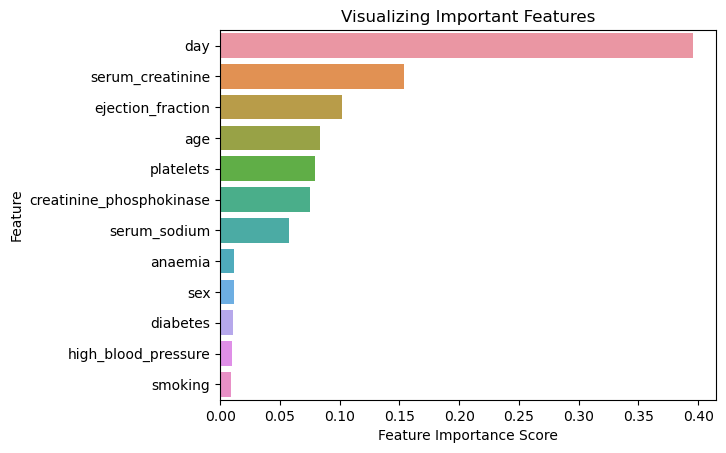

In [38]:
import seaborn as sns
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add Labels to graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title("Visualizing Important Features")
plt.show()

Terlihat bahwa variabel "time" sangat berpengaruh terhadap "DEATH_EVENT"

# Optimizing Random Forest Peformance

## Mencari Parameter terbaik

In [40]:
from sklearn.model_selection import GridSearchCV

# Penyetelan hyperparameter
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



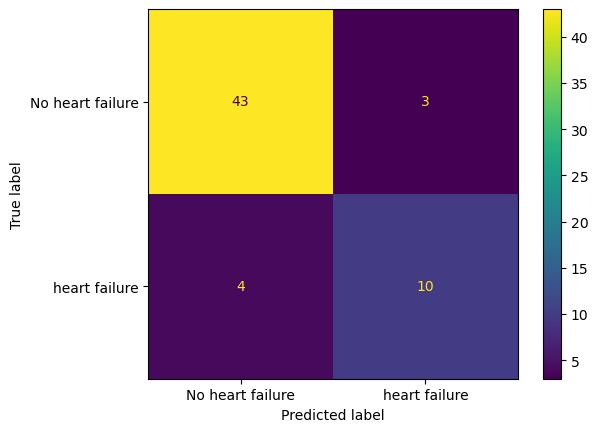

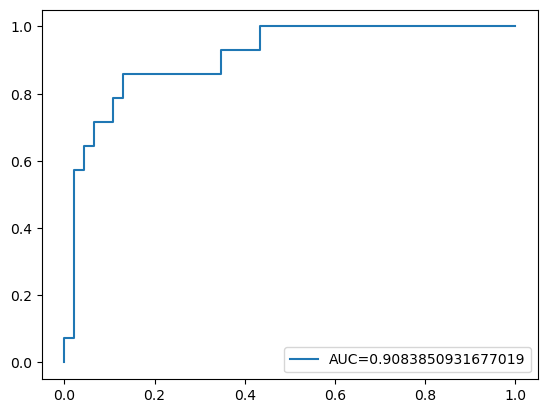

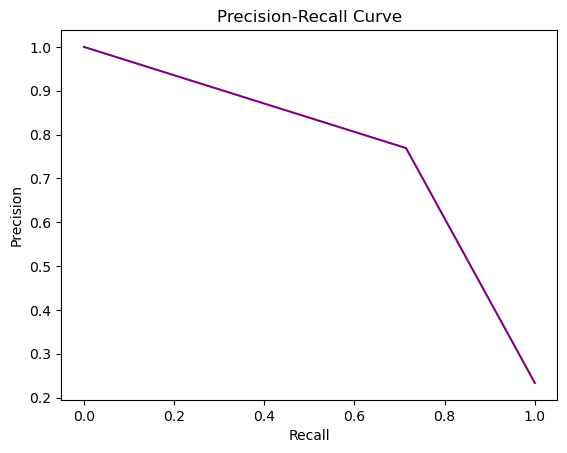

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc_curve

# implementation

sv_clf = SVC(C =0.7, kernel= 'linear', random_state=1, probability= True)
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)

# evaluation

sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)
print(classification_report(y_test, sv_clf_pred))

# confusion matrix

cm = confusion_matrix(y_test, sv_clf_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC curve

y_pred_proba = sv_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# precision recall curve

precision, recall, thresholds = precision_recall_curve(y_test, sv_clf_pred)
plt.plot(recall, precision, color='purple')
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [41]:
# Membuat dan melatih model Random Forest dengan parameter terbaik
best_rf_model = RandomForestClassifier(max_depth=None, n_estimators=200, random_state=42)
best_rf_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluasi performa model
print("Best Random Forest Accuracy:", accuracy_score(y_test, best_rf_predictions))
print("Classification Report:\n", classification_report(y_test, best_rf_predictions))

Best Random Forest Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



# Membuat model Gradient Boosting

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [45]:
adaboost_predictions = adaboost_model.predict(X_test)

# Evaluasi performa model
print("AdaBoost Accuracy:", accuracy_score(y_test, adaboost_predictions))
print("Classification Report:\n", classification_report(y_test, adaboost_predictions))

AdaBoost Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.75      0.60      0.67        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.75      0.75      0.74        60



## Evaluasi Model

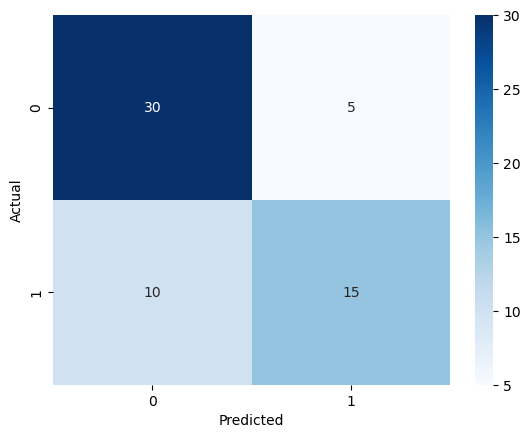

In [46]:
# Prediksi menggunakan model Decision Tree Classifier
predictions = adaboost_model.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, predictions, labels=adaboost_model.classes_)

# Menampilkan confusion matrix dengan format angka tanpa eksponensial menggunakan heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Implementasi ensemble learning menggunakan teknik Voting Classifier

In [49]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Mendefinisikan model-model yang akan digunakan
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
ada_boost_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
logistic_regression_model = LogisticRegression(random_state=42)
svm_model = SVC(probability=True, random_state=42)

In [50]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
# Membuat ensemble model dengan teknik Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('random_forest', random_forest_model),
        ('ada_boost', ada_boost_model),
        ('logistic_regression', logistic_regression_model),
        ('svm', svm_model)
    ],
    voting='soft'  # 'soft' untuk memberikan bobot pada prediksi berdasarkan probabilitas
)

In [51]:
# Melatih ensemble model
ensemble_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluasi performa ensemble model
print("Ensemble Model Accuracy:", accuracy_score(y_test, ensemble_predictions))
print("Classification Report:\n", classification_report(y_test, ensemble_predictions))

Ensemble Model Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82        35
           1       0.92      0.44      0.59        25

    accuracy                           0.75        60
   macro avg       0.81      0.71      0.71        60
weighted avg       0.80      0.75      0.73        60



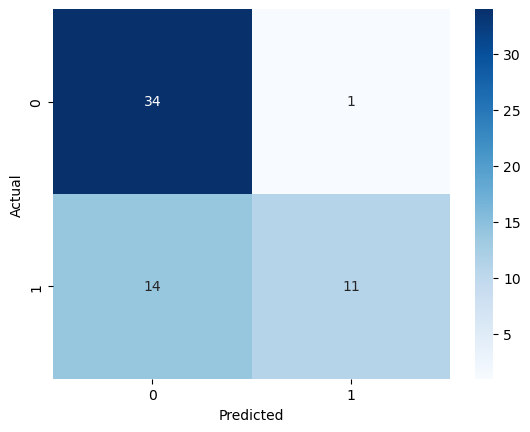

In [52]:
# Prediksi menggunakan model Decision Tree Classifier
predictions = ensemble_model.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, predictions, labels=ensemble_model.classes_)

# Menampilkan confusion matrix dengan format angka tanpa eksponensial menggunakan heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=ensemble_model.classes_, yticklabels=ensemble_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()